In [259]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler 
from torchinfo import summary
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [260]:
df=pd.read_csv('IRIS.csv',sep=';')
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,2.9,1.4,0.2,setosa
1,4.9,3.1,1.5,0.1,setosa
2,5.4,3.7,1.5,0.2,setosa
3,4.8,3.4,1.6,0.2,setosa
4,4.8,3.0,1.4,0.1,setosa


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  142 non-null    float64
 1   sepal_width   142 non-null    float64
 2   petal_length  142 non-null    float64
 3   petal_width   142 non-null    float64
 4   species       142 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.7+ KB


In [262]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [263]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,142.000000,142.000000,142.000000,142.000000
mean,5.895775,3.035211,3.888732,1.252817
std,0.817874,0.433393,1.723270,0.748208
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.450000,1.400000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='sepal_length'>

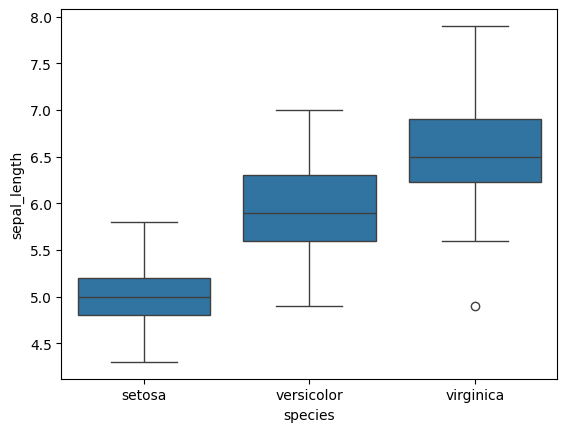

In [264]:
sns.boxplot(y='sepal_length',x='species',data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

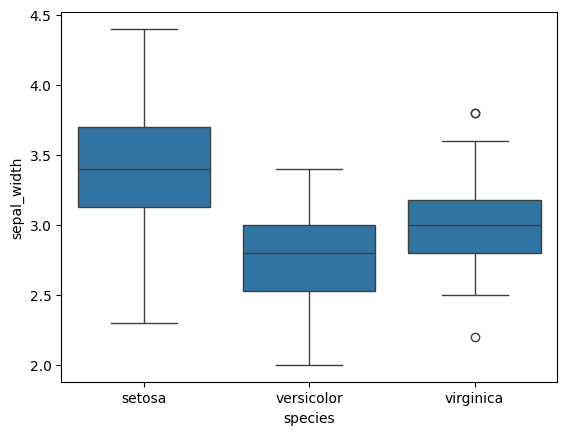

In [265]:
sns.boxplot(y='sepal_width',x='species',data=df)

<Axes: xlabel='species', ylabel='petal_length'>

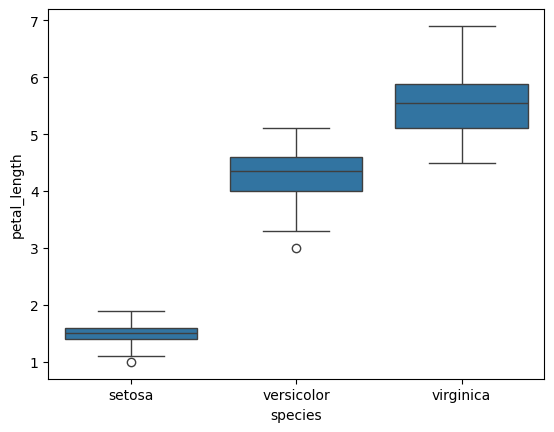

In [266]:
sns.boxplot(y='petal_length',x='species',data=df)

<Axes: xlabel='species', ylabel='petal_width'>

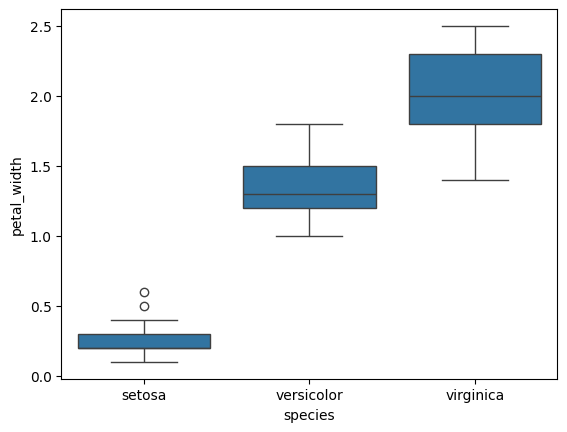

In [267]:
sns.boxplot(y='petal_width',x='species',data=df)

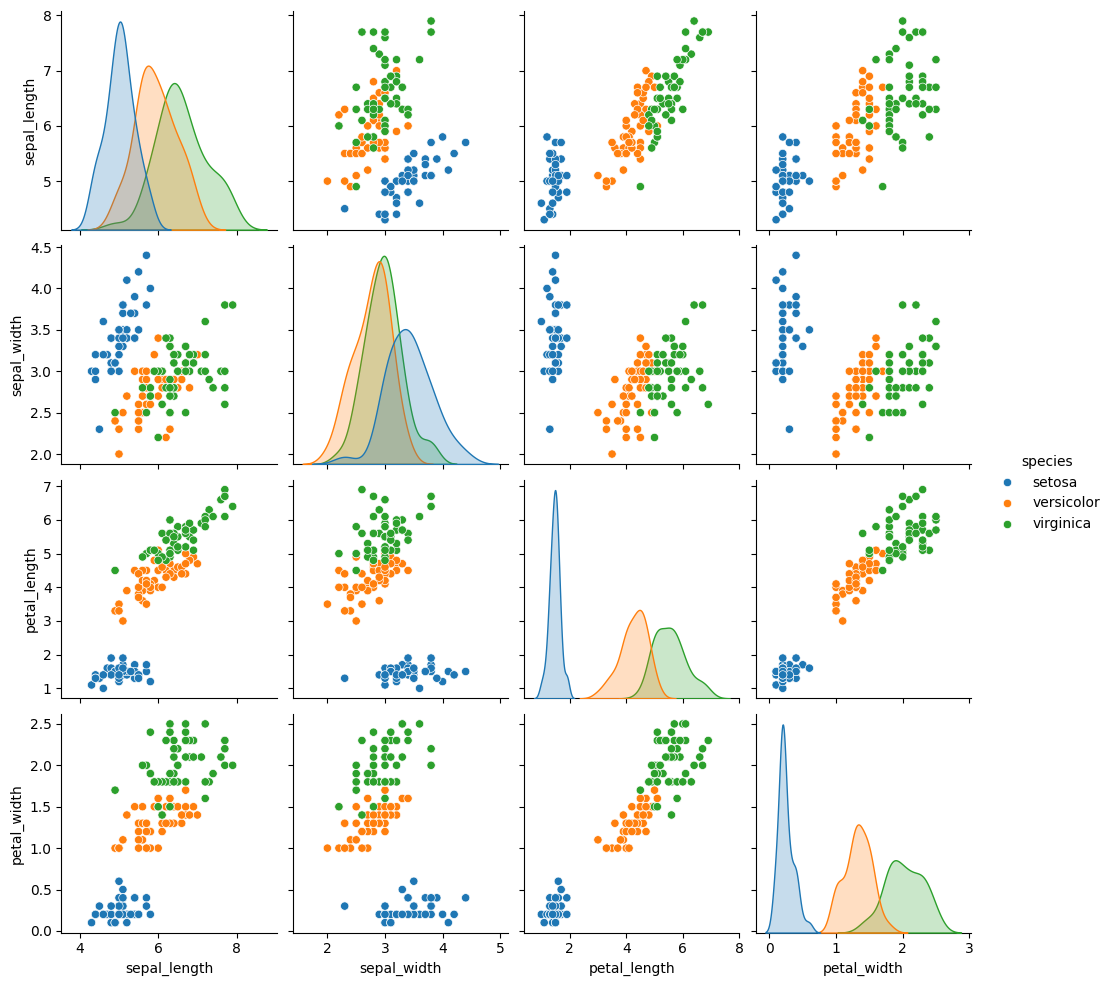

In [268]:
sns.pairplot(df,hue='species')

<Axes: >

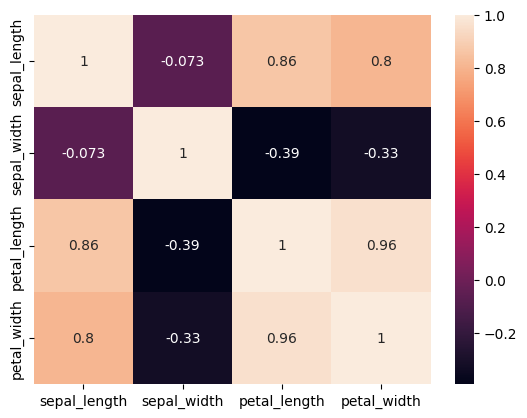

In [269]:
data=df.select_dtypes(include='float64')
sns.heatmap(data.corr(),annot=True)

In [270]:
df = df.to_numpy()

In [271]:
X=df[:,0:4]
Y=df[:,-1]

In [272]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [273]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(113, 4)
(29, 4)
(113,)
(29,)


In [274]:
label=LabelEncoder()
Y_train=label.fit_transform(Y_train)
Y_test=label.transform(Y_test)

In [275]:
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

In [276]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(113, 4)
(29, 4)
(113,)
(29,)


In [277]:
X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
Y_train = Y_train.astype(  np.int64 )    
Y_test  = Y_test.astype(   np.int64 )

In [278]:
print(Y_train.dtype)
print(Y_test.dtype)
print(X_train.dtype)
print(X_test.dtype)

int64
int64
float32
float32


In [279]:
X_train=torch.from_numpy(X_train)
X_test=torch.from_numpy(X_test)
Y_train=torch.from_numpy(Y_train).long()
Y_test=torch.from_numpy(Y_test).long()

In [280]:
train_dataset = TensorDataset(X_train, Y_train) 
test_dataset = TensorDataset(X_test, Y_test) 
  
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) 
test_loader = DataLoader(test_dataset, batch_size=X_test.shape[0], shuffle=False)

In [281]:
class LogisticRegression(nn.Module):
    def __init__(self,input_size,num_classes):
        super(LogisticRegression,self).__init__()
        self.linear1=nn.Linear(input_size,num_classes)
    def forward(self,x):
        y_pred=self.linear1(x)
        return y_pred   

In [282]:
model=LogisticRegression(input_size=4,num_classes=3)
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model=model.to(device)
summary(model, input_size=(16,4))

Layer (type:depth-idx)                   Output Shape              Param #
LogisticRegression                       [16, 3]                   --
├─Linear: 1-1                            [16, 3]                   15
Total params: 15
Trainable params: 15
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [283]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=0.02)

In [284]:
num_epoch=2000
for epoch in range(num_epoch):
    for inputs,labels in train_loader:
        inputs=inputs.to(device)
        labels=labels.to(device)
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1)%100 == 0: 
        print('Epoch [{}/{}], Loss: {:.4f}'
        .format(epoch+1, num_epoch, loss.item()))    

Epoch [100/2000], Loss: 0.2157
Epoch [200/2000], Loss: 0.2883
Epoch [300/2000], Loss: 0.1452
Epoch [400/2000], Loss: 0.5452
Epoch [500/2000], Loss: 0.0447
Epoch [600/2000], Loss: 0.0031
Epoch [700/2000], Loss: 0.0097
Epoch [800/2000], Loss: 0.2144
Epoch [900/2000], Loss: 0.0082
Epoch [1000/2000], Loss: 0.0560
Epoch [1100/2000], Loss: 0.0036
Epoch [1200/2000], Loss: 0.0028
Epoch [1300/2000], Loss: 1.0355
Epoch [1400/2000], Loss: 0.0202
Epoch [1500/2000], Loss: 0.0053
Epoch [1600/2000], Loss: 0.0391
Epoch [1700/2000], Loss: 0.0028
Epoch [1800/2000], Loss: 0.2239
Epoch [1900/2000], Loss: 0.8769
Epoch [2000/2000], Loss: 0.0012


In [285]:
def evaluation(y_test,y_pred):
    print('Accuracy:%.2f'% accuracy_score(y_test,y_pred))
    conf=confusion_matrix(y_test,y_pred)
    print('confusion_matrix: \n',conf)
    print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
    print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))
    print('f1_score: %.3f' % f1_score(y_test,y_pred,average='weighted'))

In [286]:
with torch.no_grad():
    for x,y in test_loader:
        y_pred=model(x)
        probs = torch.softmax(y_pred, dim=1)  
        pred = torch.argmax(probs, dim=1)  
        evaluation(y,pred)

Accuracy:1.00
confusion_matrix: 
 [[ 8  0  0]
 [ 0  9  0]
 [ 0  0 12]]
Precision: 1.000
Recall: 1.000
f1_score: 1.000
